## Outcomes and Variables

In [30]:
#import numpy and pandas package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Mimic the roll dice game

In [2]:
# roll two dice for multiple times
die = pd.DataFrame([1, 2, 3, 4, 5, 6])
sum_of_dice = die.sample(2, replace=True).sum().loc[0]
print('Sum of dice is', sum_of_dice)  

# you may get different outcomes as we now mimic the result of rolling 2 dice, but the range must be limited between 2 and 12. 

Sum of dice is 3


In [3]:
# It is your turn! let's replace the none with the code of rolling three dice, instead of two

np.random.seed(1)  # This is for checking answer, do NOT modify this line of code

#Modify the code, replace the None
sum_of_three_dice = die.sample(3, replace=True).sum().loc[0]

In [4]:
print('Sum of three dice is', sum_of_three_dice)

Sum of three dice is 15


**Expected output: ** Sum of three dice is 15

### Mimic the roll dice game for multiple times

In [5]:
# The following code mimics the roll dice game for 50 times. And the results are all stored into "Result"
# Lets try and get the results of 50 sum of faces.

trial = 50
result = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]

In [6]:
#print the first 10 results
print(result[:10])

[3, 10, 2, 7, 11, 5, 11, 8, 9, 8]


###  Frequency and Distribution

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# To recall, this is the code to mimic the roll dice game for 50 times

die = pd.DataFrame([1, 2, 3, 4, 5, 6])
trial = 50
results = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]

In [9]:
# This is the code for summarizing the results of sum of faces by frequency

freq = pd.DataFrame(results)[0].value_counts()
sort_freq = freq.sort_index()
print(sort_freq)

3      4
4      4
5      5
6      6
7     12
8      7
9      3
10     5
11     3
12     1
Name: 0, dtype: int64


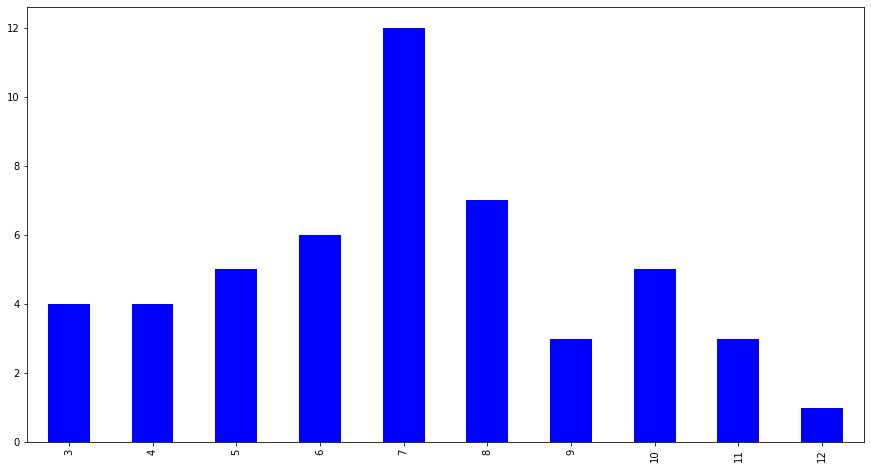

In [10]:
#plot the bar chart base on the result

sort_freq.plot(kind='bar', color='blue', figsize=(15, 8))

### Relative Frequency

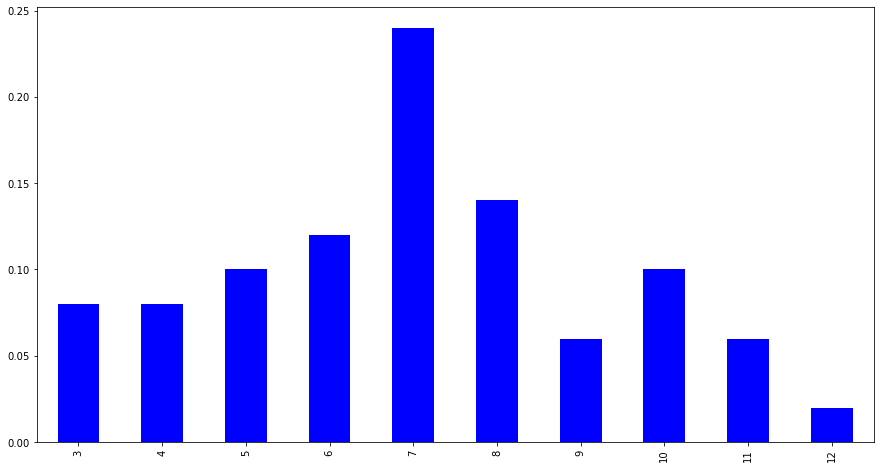

In [12]:
# Using relative frequency, we can rescale the frequency so that we can compare results from different number of trials
relative_freq = sort_freq/trial
relative_freq.plot(kind='bar', color='blue', figsize=(15, 8))

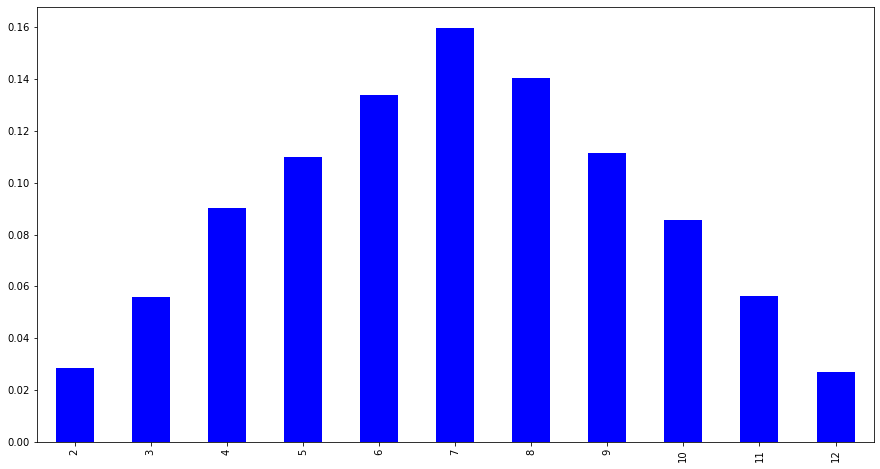

In [13]:
# Let us try to increase the number of trials to 10000, and see what will happen...
trial = 10000
results = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]
freq = pd.DataFrame(results)[0].value_counts()
sort_freq = freq.sort_index()
relative_freq = sort_freq/trial
relative_freq.plot(kind='bar', color='blue', figsize=(15, 8))

## We can see that with more trials, the result looks more and more stable, and this is very close to a probability distribution. Try increasing the number of "trial" further (but it may take some time for Jupyter Notebook to output the result)

# Expectation and Variance of a distribution

In [14]:
# assume that we have fair dice, which means all faces will be shown with equal probability
# then we can say we know the 'Distribtuion' of the random variable - sum_of_dice

X_distri = pd.DataFrame(index=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
X_distri['Prob'] = [1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]
X_distri['Prob'] = X_distri['Prob']/36
X_distri

,Prob
2,0.027778
3,0.055556
4,0.083333
5,0.111111
6,0.138889
7,0.166667
8,0.138889
9,0.111111
10,0.083333
11,0.055556


In [15]:
mean = pd.Series(X_distri.index * X_distri['Prob']).sum()
var = pd.Series(((X_distri.index - mean)**2)*X_distri['Prob']).sum()

In [16]:
#Output the mean and variance of the distribution. Mean and variance can be used to describe a distribution
print(mean, var)

6.999999999999998 5.833333333333333


## Empirical mean and variance

In [17]:
# if we calculate mean and variance of outcomes (with high enough number of trials, eg 20000)...
trial = 20000
results = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]

In [19]:
#print the mean and variance of the 20000 trials
results = pd.Series(results)
print(results.mean(), results.var())

7.0087 5.839516285814291


##  Models of Stock Return

In [21]:
ms = pd.read_csv('microsoft.csv',index_col = 0)
ms.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100


## Distribution of Log return

In [26]:
# let play around with ms data by calculating the log daily return
ms['LogReturn'] = np.log(ms['Close']).shift(-1) - np.log(ms['Close'])

In [31]:
# Plot a histogram to show the distribution of log return of Microsoft's stock. 
# You can see it is very close to a normal distribution
from scipy.stats import norm
mu = ms['LogReturn'].mean()
sigma = ms['LogReturn'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(ms['LogReturn'].min()-0.01, ms['LogReturn'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

ms['LogReturn'].hist(bins=50, figsize=(15, 8))
plt.plot(density['x'], density['pdf'], color='red')
plt.show()

ModuleNotFoundError: No module named 'scipy'